<h1> <center> INTRODUCTION</center> </h1>

<h2> <center>ALY 6140 Final Project Submission </center> </h2>

<h3><center>TITANIC: MACHINE LEARNING FROM DATASET</center></h3>

<h4><center> By: Darshan Shah</center></h4>



'TITANIC: Machine Learning from Disaster' is the project based on the predicting the survival of Titanic Passengers, this project can be extended in prediction of the passengers survival on the other maritime dissasters as well like MV Gustloff Wilhem, etc. The dataset present for the project is taken from the Kaggle dataset. The link for the dataset is given as follows: 
https://www.kaggle.com/c/titanic/data

In [5]:
#Load in our libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Going to use these seven machine learning models for titanic dataset
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#loading the data in the notebook
train = pd.read_csv('train_titanic.csv')
train1 = pd.read_csv('train_titanic.csv')
test = pd.read_csv('test_titanic.csv')
gs = pd.read_csv('gender_submission_titanic.csv')

<h1> Data Pre-processing </h1>

For data preprocessing of the titanic dataset, the basic functions like info, describe, head can be used. Thiis is very helpful inorder to get the overall look of the data, knowing the variables, missing data and also range of the values corressponding to particular column of the dataset. 
By implementing the basic functions, it can be seen that the data is missing for many columns like age, cabin and embarked columns respectively. It can be also seen that from the shape function that the train and test dataset has 891 and 418 entries respectively. The dataset also has one target or dependent variable is 'Survived' column which states 0 as passenger didn’t survive and 1 as passenger survived the disaster in the titanic dataset. Besides the dependent variable, the dataset has eleven independent variables where six columns are numerical and 5 columns have text field respectively.  
Some basic explanation of the data is as follows: 
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


In [10]:
print(train.shape)
print(test.shape)
print(train.info())
print(test.info())
print(train.describe())
print(test.describe())

(891, 12)
(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare    

<h1> Data Cleaning, Feature Extraction and Feature Selection </h1>

Since in the pre-processing stage, it could be seen that there were lot of missing values, we deal with this by creating a new list which compromises of both test and train data. Since 'Name' column was not fruitfull in comparison with the modelling of the data, I created a new column called 'Name Length', where the name length is counted and we removed the'name' column respectively. 
Also, in the 'Cabin' column, it had the most missing values in the dataset, instead of deleting the column,I created a new colun called as 'had_cabin' where if the passenger has cabin, then he or she is marked as 1 or else 0, this also converts the variable into a categorical variable. 
In the original dataset, where 'Sibsp' and 'Parch' was converted into single column like 'Family Size' where we just added the earlier columns. 'Alone' is the new column, which states that if the passenger's 'Family Size' is 1, then it he or she is alone and vice versa. Also, firstly, we fill the missing values in the 'fare' and 'age' dataset with mean and median function and then categorize the value, to get better result. 
Lastly, the variables which are bad for the model, or adding them in machine learning model, wont make Significant difference, are removed, both from test and train dataset. 

In [3]:
train = train.dropna(axis=0, subset=['Embarked'])
train = train.dropna(axis=0, subset=['Sex'])

data = [train, test]

train['Name Length'] = train['Name'].apply(len)
test['Name Length'] = test['Name'].apply(len)

train['had_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['had_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

for i in data:
    i['Family Size'] = i['SibSp'] + i['Parch'] + 1
    
for i in data:
    i['Alone'] = 0
    i.loc[i['Family Size'] == 1, 'Alone'] = 1
        
for i in data:
    i['Fare'] = i['Fare'].fillna(train['Fare'].median())

for i in data:
    i['Age'] = i['Age'].fillna(train['Age'].mean())

for i in data:
     i['Sex'] = i['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
     i['Embarked'] = i['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
     i.loc[i['Fare'] <= 9.5, 'Fare'] = 0
     i.loc[(i['Fare'] > 9.5) & (i['Fare'] <= 19), 'Fare'] = 1
     i.loc[(i['Fare'] > 19) & (i['Fare'] <= 28.5), 'Fare'] = 2
     i.loc[(i['Fare'] > 28.5) & (i['Fare'] <= 38), 'Fare'] = 3
     i.loc[i['Fare'] > 38, 'Fare'] = 4
     i['Fare'] = i['Fare'].astype(int)
    
     i.loc[i['Age'] <= 18, 'Age'] = 0
     i.loc[(i['Age'] > 18) & (i['Age'] <= 36), 'Age'] = 1
     i.loc[(i['Age'] > 36) & (i['Age'] <= 54), 'Age'] = 2
     i.loc[(i['Age'] > 54) & (i['Age'] <= 72), 'Age'] = 3
     i.loc[i['Age'] > 72, 'Age'] = 4 
     i['Age'] = i['Age'].astype(int)

train1 = train1.dropna(axis=0, subset=['Embarked'])
train1 = train1.dropna(axis=0, subset=['Sex'])
train1 = train1.dropna(axis=0, subset=['Age'])

# Feature selection
drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','Parch']
train = train.drop(drop, axis = 1)
test  = test.drop(drop, axis = 1)

In [4]:
print(train.describe())
print(train.head())

         Survived      Pclass         Sex         Age        Fare    Embarked  \
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000   
mean     0.382452    2.311586    0.649044    1.109111    1.551181    0.362205   
std      0.486260    0.834700    0.477538    0.715353    1.548001    0.636157   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000    1.000000    0.000000    0.000000   
50%      0.000000    3.000000    1.000000    1.000000    1.000000    0.000000   
75%      1.000000    3.000000    1.000000    1.000000    3.000000    1.000000   
max      1.000000    3.000000    1.000000    4.000000    4.000000    2.000000   

       Name Length   had_Cabin  Family Size       Alone  
count   889.000000  889.000000   889.000000  889.000000  
mean     26.958380    0.227222     1.906637    0.601800  
std       9.276257    0.419273     1.614703    0.489803  
min      12.000000    0.000000     1.0

<h1> Data Visualization </h1>

In this part of the project, I have plotted various graphs, plots, etc. to know the data in a much better way and also understand the data. The plots uses matplotlib and seaborn libraries from the python and they are imported above. 

The plot below explains the Pclass or socio economic class by survival, where the x axis is the p-class i.e., 1 is for upper class, 2 is for middle class and 3 is lower class. We can infer that the out of approximately 175 passengers who belong to upper class, 125 people survived the titanic disaster, they were given priority and were evacuated first, followed by the other two class. 

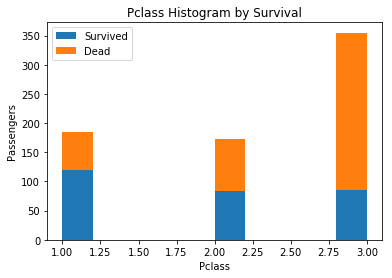

In [12]:
plt.hist(x = [train1[train1['Survived']==1]['Pclass'], train1[train1['Survived']==0]['Pclass']], 
         stacked=True,label = ['Survived','Dead'])
plt.title('Pclass Histogram by Survival')
plt.xlabel('Pclass')
plt.ylabel('Passengers')
plt.legend()

The plot below explains the Sex or Gender by survival, where the x axis is the Sex i.e., male or female. We can infer that the out of approximately 265 passengers who belong to female category, around 200 females survived the titanic disaster, they were given priority and were evacuated first, followed by the male class, where less than 100 males could survive from 450 males. 

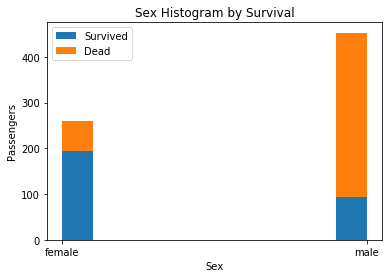

In [13]:
plt.hist(x = [train1[train1['Survived']==1]['Sex'], train1[train1['Survived']==0]['Sex']], 
         stacked=True,label = ['Survived','Dead'])
plt.title('Sex Histogram by Survival')
plt.xlabel('Sex')
plt.ylabel('Passengers')
plt.legend()

The plot below explains the age by survival, where the x axis is the age which ranges from 0 to 80. We can infer that the out of approximately 90 passengers who belong to children or millenial age group i.e. from 0-18 years, 65 of them survived the titanic disaster, they were given priority and were evacuated first, followed by baby boomers and etc. 

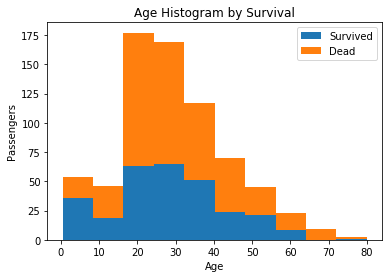

In [14]:
plt.hist(x = [train1[train1['Survived']==1]['Age'], train1[train1['Survived']==0]['Age']], 
         stacked=True,label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('Passengers')
plt.legend()

The plot below explains the Alone class by survival, where the x axis is the whether the passenger is travelling alone or not, i.e., 0 is for yes, the passenger is alone and 1 is for no, the passenger is not alone. We can infer that the out of approximately 350 passengers who belong to alone class, 175 people survived the titanic disaster, which is better ratio then the other class where, we can see that the ratio of survial of that passenger is approximately 35%. 

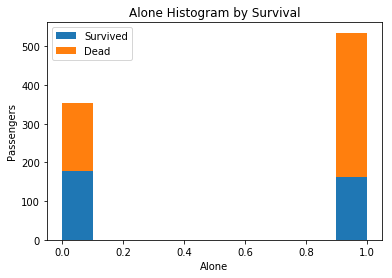

In [15]:
plt.hist(x = [train[train['Survived']==1]['Alone'], train[train['Survived']==0]['Alone']], 
         stacked=True,label = ['Survived','Dead'])
plt.title('Alone Histogram by Survival')
plt.xlabel('Alone')
plt.ylabel('Passengers')
plt.legend()

The plot below explains the Family Size by survival, where the x axis is the Family Size ranging from 1 to 11 people. We can infer from the graph that for the family of 2, the ratio of survival was the worst, in comparison to the others, where their ratio rate is almost 50%. 

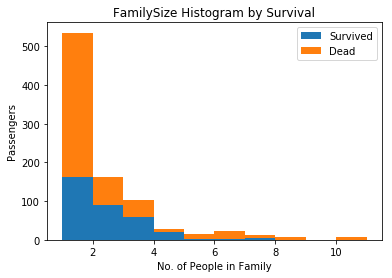

In [16]:
plt.hist(x = [train[train['Survived']==1]['Family Size'], train[train['Survived']==0]['Family Size']], 
         stacked=True,label = ['Survived','Dead'])
plt.title('FamilySize Histogram by Survival')
plt.xlabel('No. of People in Family')
plt.ylabel('Passengers')
plt.legend()

The plot below explains the Fare by survival, where the x axis is the Fare ranging from 0 to 525 Dominance. We can infer from the graph that for the fare above 200 , the ratio of survival was the worbest in the sense, like no casualties and everyone survived, however, after 50, the survival rate of the passenger is also not tha bad and its the worst for the passengers who paid less than 50 as their fare, and so the prioirity of evacuation also followed in the same rate.

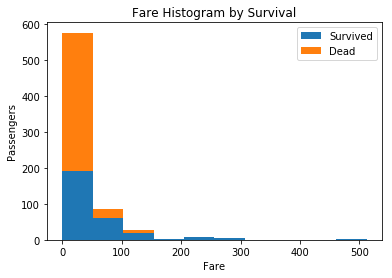

In [17]:
plt.hist(x = [train1[train1['Survived']==1]['Fare'], train1[train1['Survived']==0]['Fare']], 
         stacked=True,label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare')
plt.ylabel('Passengers')
plt.legend()

The plot below explains the Embarked Size by survival, where the x axis is the Port from which the passenger boarded the ship. We can infer from the graph that for the passenger who boarded from Cherbough, the ratio of survival was the the best, in comparison to the others, where their ratio rate is less than 50%. 

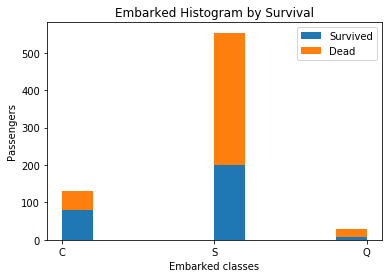

In [18]:
plt.hist(x = [train1[train1['Survived']==1]['Embarked'], train1[train1['Survived']==0]['Embarked']], 
         stacked=True,label = ['Survived','Dead'])
plt.title('Embarked Histogram by Survival')
plt.xlabel('Embarked classes')
plt.ylabel('Passengers')
plt.legend()

Pair plots are used for understanding the relationship between two dependent variables by classifying the data in two seperate clusters with the help of line, also the simple 2d plots help in understanding the graph in much better way. We can infer from the pairplots which is nothing but the scatter plot, where we can see that each variable is plotted against the other variable for the whole dataset and this helps in understanding the data in more better way. 

Text(0.5,1,'PAIRPLOT')

<Figure size 720x720 with 0 Axes>

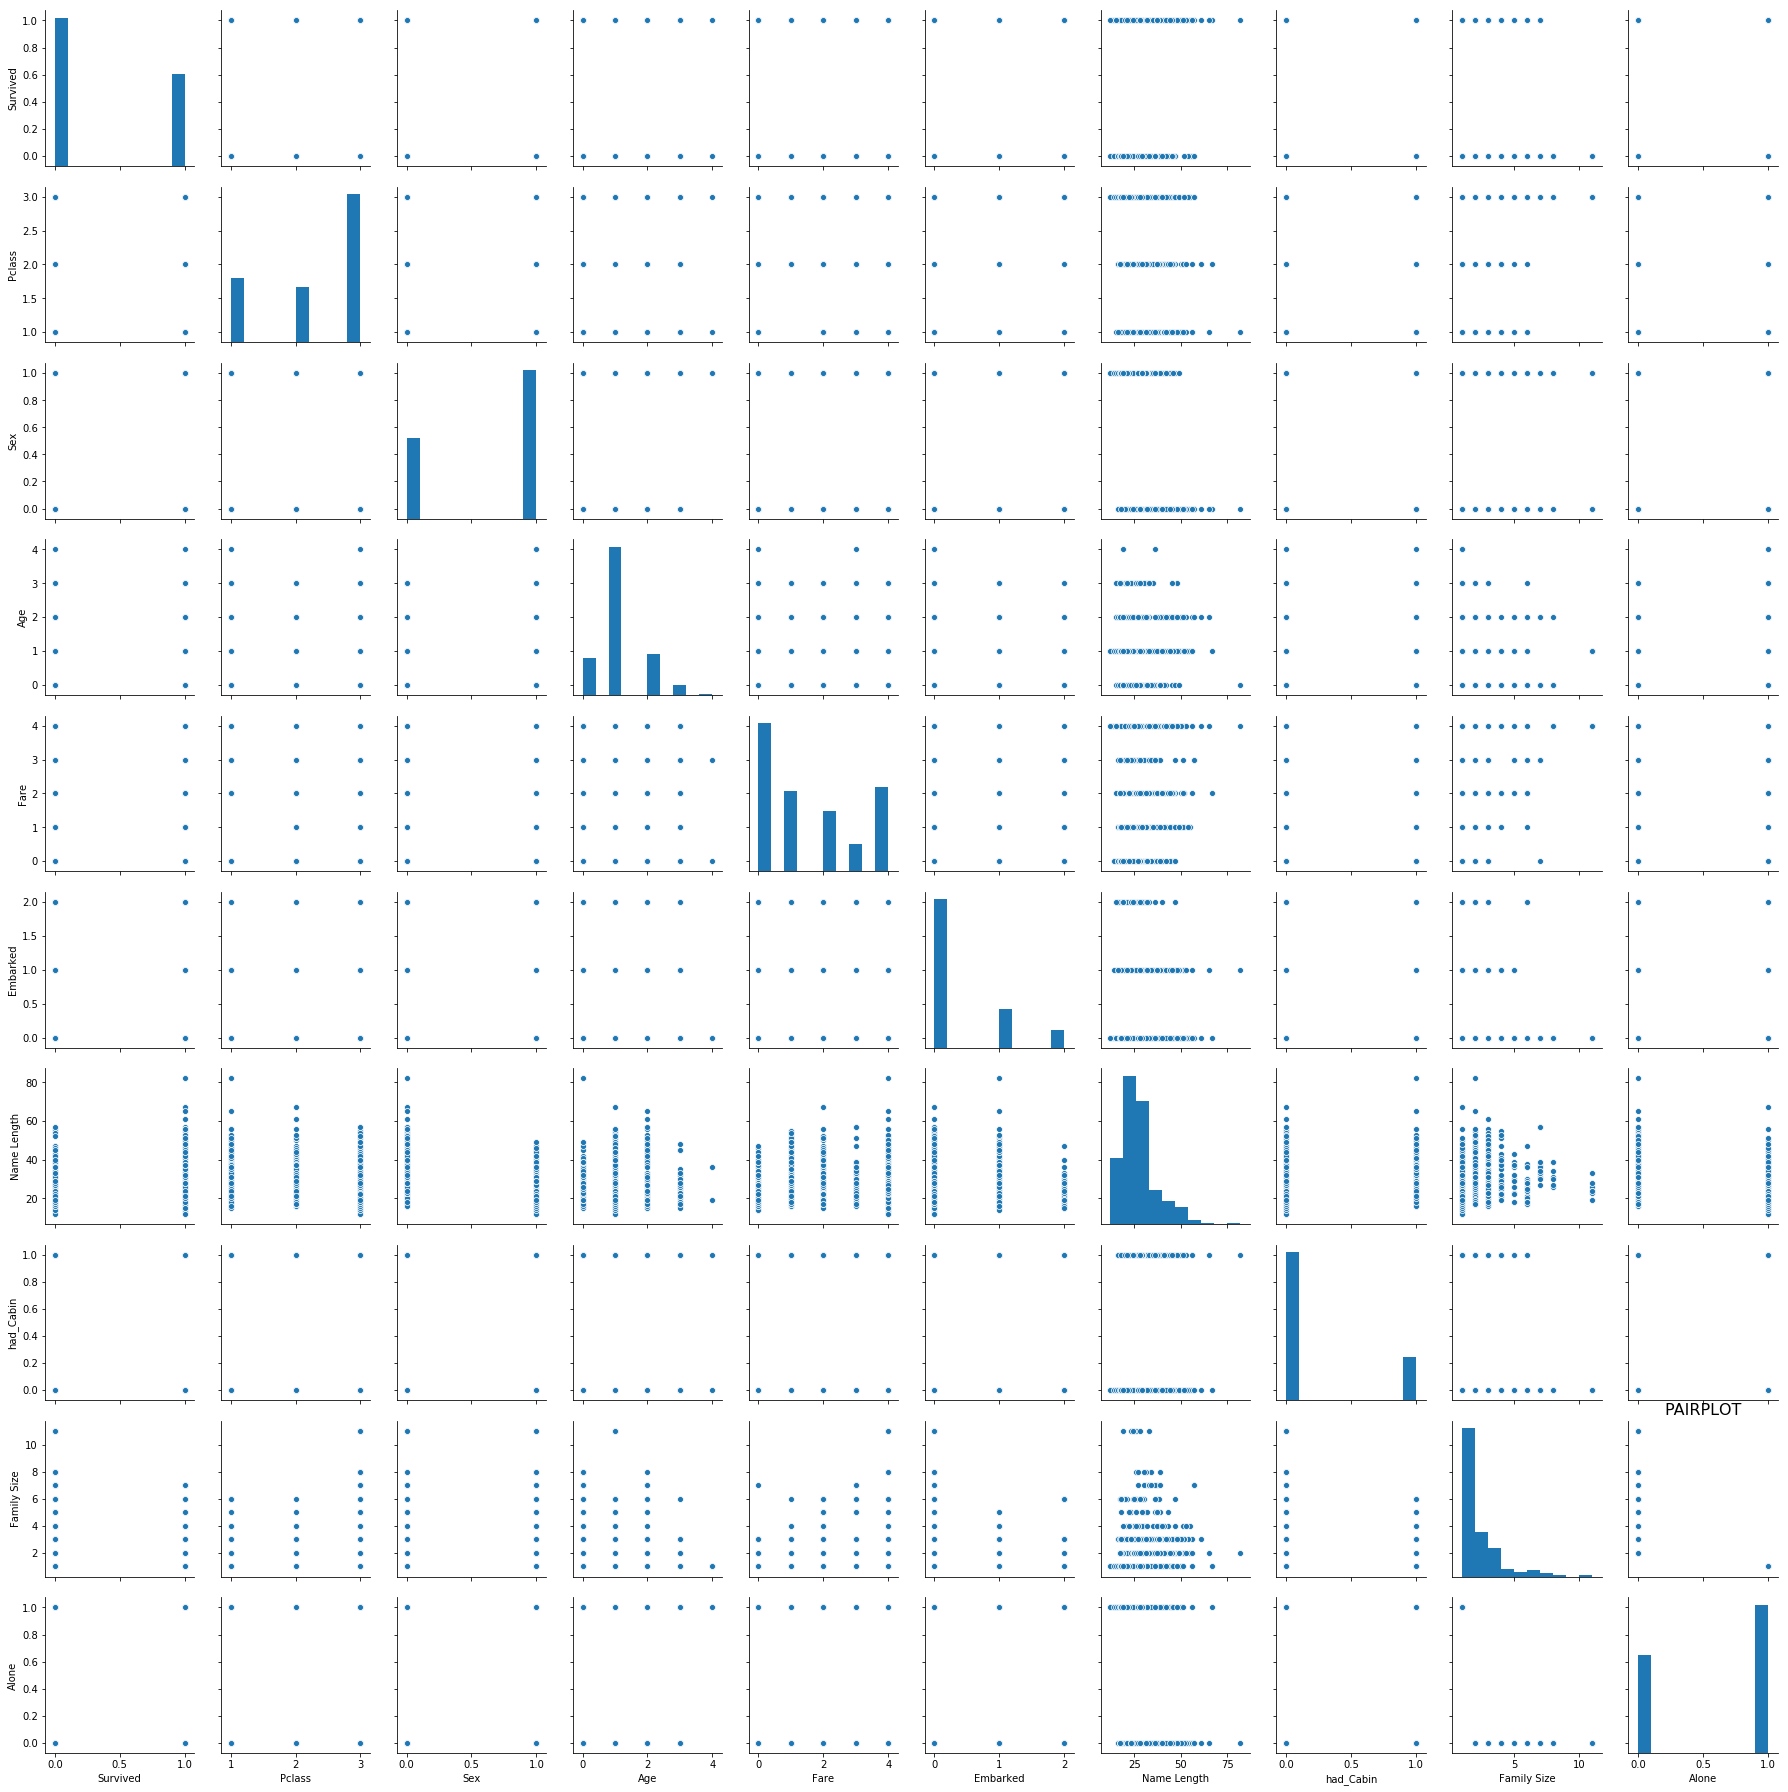

In [19]:
plt.figure(figsize=(10,10))
g = sns.pairplot(train)
plt.title("PAIRPLOT", fontsize=16)

Corrplot is basically graphical representation od correlation matrix and confidence interval as well. We can infer from the corrplot like which two variables are closely correlated and discard one of them to make our model better. In the coorplot below, it can be seen that the no two variables are closely related, the one which is highest correlated in our case is fare and had_cabin column from the dataset.

Text(0.5,1,'CORRELATION HEATMAP')

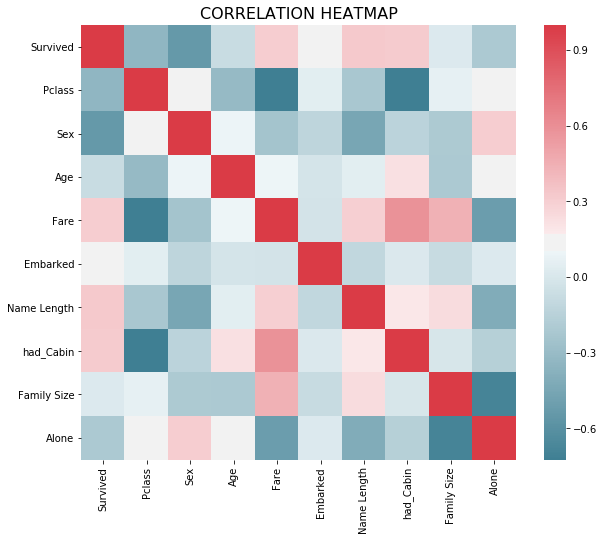

In [20]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title("CORRELATION HEATMAP", fontsize=16)


<h1> Essembling and Stacking Models</h1>

In the next step, we create the training and testing model for predicting models. We confirm the same from the shape attribute which denotes the dimensions of the dataframe or list. 

In [21]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test
Y_test = gs["Survived"]
print(X_train.shape) 
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(889, 9)
(889,)
(418, 9)
(418,)


<h1>Generating Predicting Models</h1>

In this part, we generate various predicting models for our respective machine learning and will further use the best working model and will calculate that by accuracy. Also in this part, sklearn library used and is imported in the start of the notebook. 

<h2>Logistic Regression model</h2>

In [22]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
alog = lr.score(X_train, Y_train) * 100
alog

80.76490438695163

<h2>Support Vector Machine model</h2>

In [23]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
asvc = svc.score(X_train, Y_train) * 100
asvc

86.61417322834646

<h2>K Nearest Neighbor model </h2>

In [26]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
aknn = knn.score(X_train, Y_train) * 100
aknn

85.8267716535433

<h2>Gaussian Naive Bayes model </h2>

In [27]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred = nb.predict(X_test)
agnb = nb.score(X_train, Y_train) * 100
agnb

76.6029246344207

<h2> Decision Tree model </h2>

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
adt = dt.score(X_train, Y_train) * 100
adt

96.17547806524185

<h2> Random Forest model </h2>

In [29]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
rf.score(X_train, Y_train)
arf = rf.score(X_train, Y_train) * 100
arf

96.17547806524185

<h2> Perceptron model </h2>

In [30]:
pct = Perceptron()
pct.fit(X_train, Y_train)
Y_pred = pct.predict(X_test)
apct = pct.score(X_train, Y_train) * 100
apct

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


64.67941507311586

<h3>Selecting the best fitted model</h3>

Out of all the predictive models applied above, we could see that Random Forest and Decision Tree, both the models work better in comparison with other models, as both had the highest accuracy amongst the remaining models with 96.17%. 
I think Random Forest model is better than Decision tree model because of it’s ability to limit overfitting without substantially increasing error due to bias.


In [31]:
mod = pd.DataFrame({
    'Machine Learning Models': ['Logistic Regression','Support Vector Machines', 'K Nearest Neighbors', 
              'Random Forest', 'Naive Bayes', 'Perceptron','Decision Tree'],
    'Accuracy': [alog, asvc, aknn, arf, agnb, apct, adt]})
mod.sort_values(by='Accuracy', ascending=False)


,Machine Learning Models,Accuracy
3,Random Forest,96.175478
6,Decision Tree,96.175478
1,Support Vector Machines,86.614173
2,K Nearest Neighbors,85.826772
0,Logistic Regression,80.764904
4,Naive Bayes,76.602925
5,Perceptron,64.679415


<h1>Feature Importance</h1>

In this part, we select the best parameters which affect the dependent or the target variable which in our case is survived column. The importance can be determined by the weight that is attached to the corresponding column. 

<h2>Random Forest model</h2>

From the table below, it could be seen that Name Length, Sex and Pclass are strongly associated with the target variable, accounting to more than 50%, and the least associated with the target variable is alone part of the dataset. 

In [32]:
df = train.drop('Survived', 1)
summary = pd.DataFrame(list(zip(df.columns, \
    np.transpose(rf.feature_importances_), \
    )))
print(summary.sort_values(by=1, ascending=False))

             0         1
5  Name Length  0.304584
1          Sex  0.260694
0       Pclass  0.087821
3         Fare  0.080296
2          Age  0.080108
7  Family Size  0.074359
4     Embarked  0.048216
6    had_Cabin  0.045794
8        Alone  0.018128


<h2>Decision Tree model</h2>

From the table below, it could be seen that Sex, Name Length and Pclass are strongly associated with the target variable, accoynting to more than 50%, and the least associated with the target variable is alone part of the dataset. 

In [33]:
summary1 = pd.DataFrame(list(zip(df.columns, \
    np.transpose(dt.feature_importances_), \
    )))
print(summary1.sort_values(by=1, ascending=False))

             0         1
1          Sex  0.328045
5  Name Length  0.234535
0       Pclass  0.104728
7  Family Size  0.086764
2          Age  0.074982
3         Fare  0.066250
6    had_Cabin  0.047618
4     Embarked  0.032638
8        Alone  0.024439
